In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [6]:
model=Sequential()

In [7]:
model.add(Flatten(input_shape=(28,28)))

In [8]:
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 704us/step - loss: 0.2644 - accuracy: 0.9246
Epoch 2/3
1875/1875 [==============================] - 1s 688us/step - loss: 0.1106 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 1s 692us/step - loss: 0.0768 - accuracy: 0.9760


In [11]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 495us/step - loss: 0.0958 - accuracy: 0.9696


In [12]:
print(loss)

0.09580569714307785


In [13]:
print(accuracy)

0.9696000218391418


In [14]:
predictions=model.predict(x_test)

In [15]:
print(predictions)

[[3.09935477e-09 4.68507988e-09 4.90387606e-07 ... 9.99990106e-01
  1.23495916e-08 9.51078107e-07]
 [2.04248907e-09 6.00410349e-05 9.99928951e-01 ... 3.21340121e-10
  4.37526950e-07 1.90881505e-10]
 [1.96104043e-06 9.98434365e-01 1.67133418e-04 ... 3.51169612e-04
  8.77094280e-04 2.81887992e-06]
 ...
 [5.80826720e-09 1.64172332e-06 1.07888695e-07 ... 4.81377283e-05
  2.71812867e-04 5.07414865e-04]
 [3.79464723e-06 9.38584662e-07 1.02939043e-06 ... 2.13867020e-06
  2.89446004e-02 5.07086668e-07]
 [1.26625582e-06 1.01625091e-08 4.88549347e-07 ... 3.88680726e-10
  1.47036815e-06 5.58373294e-08]]


In [16]:
print(np.argmax(predictions[5]))

1


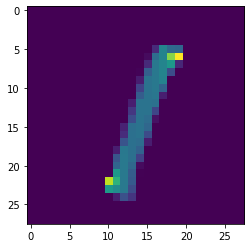

In [17]:
plt.imshow(x_test[5])

In [18]:
x_test[5].shape

(28, 28)

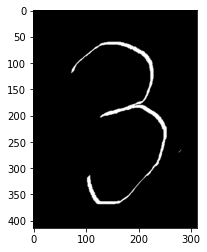

In [32]:
img1=cv2.imread("3 image.png")
plt.imshow(img1)

In [33]:
img1.shape

(414, 311, 3)

In [34]:
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray1.shape

(414, 311)

In [35]:
resized1=cv2.resize(gray1,(28,28),interpolation=cv2.INTER_AREA)
resized1.shape

(28, 28)

In [36]:
newing1=tf.keras.utils.normalize(resized1,axis=1)
newing1=np.array(newing1).reshape(-1,28,28,1)
newing1.shape

(1, 28, 28, 1)

In [37]:
pred1=model.predict(newing1)

In [38]:
print(np.argmax(pred1))

3
